## 1. Importing Libraries and creating Pathname shortcut

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
pathname=r'/Users/alejandrocisneros/Desktop/Data Analysis Coursework/Data Immersion/Achievement 4/02-2024 Instacart Basket Analysis'

In [3]:
df=pd.read_pickle(os.path.join(pathname, '2. Data', 'Prepared Data', 'ords_prods_merge_final.pkl'))

## 2. Work-through problems

<Axes: xlabel='orders_day_of_week'>

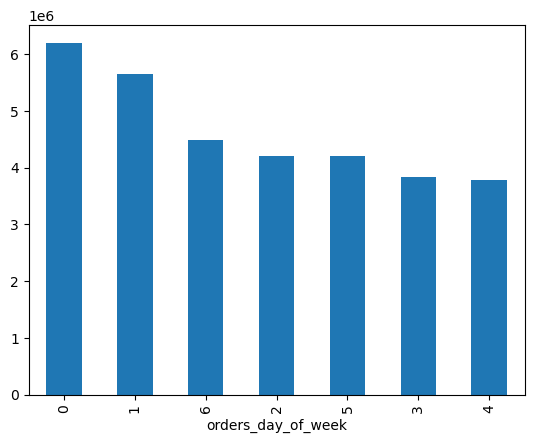

In [4]:
#Creating a bar chart with the new matplotlib library
df['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

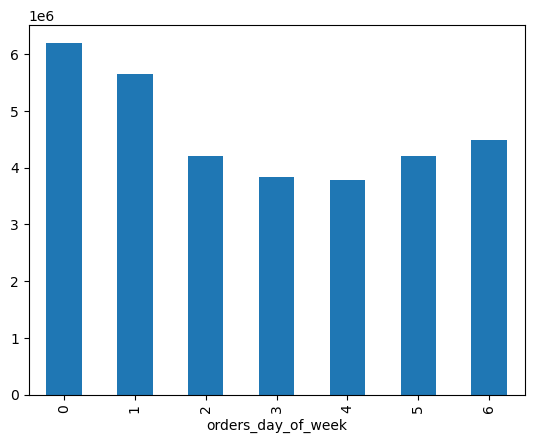

In [4]:
#The same bar chart can be organized in a different manner (i.e index order)
df['orders_day_of_week'].value_counts().sort_index().plot.bar()

### The same idea can be applied to the value.counts() function without a chart
### df['orders_day_of_week'].value_counts() orders by frequency count (largest to smallest)
### df['orders_day_of_week'].value_counts().sort_index() orders by index numbers


In [5]:
##Will not create it here for space issues but with df['orders_day_of_week'].value_counts().plot.bar(color=['color1', 'color2', etc])
#You can create a color chart

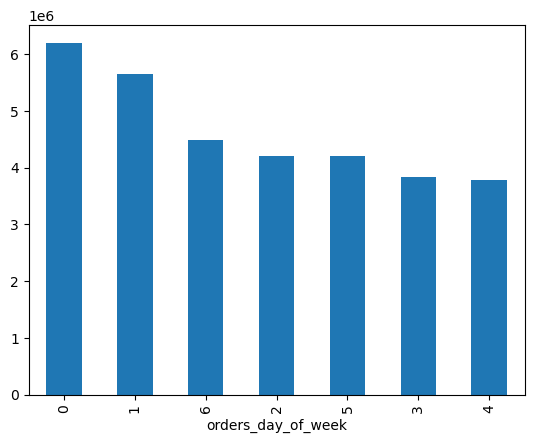

In [7]:
#In order to use any chart created in Jupyter, we first need to assign a variable to that chart. Once that is done,
#it needs to be exported directly. First, we will assign it a variable.
bar_chart=df['orders_day_of_week'].value_counts().plot.bar()

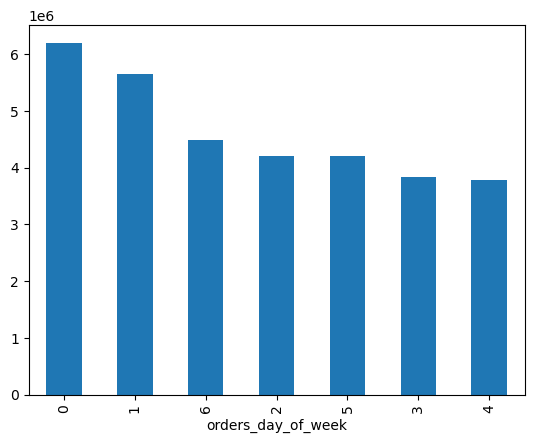

In [8]:
#Testing. As it is a variable containing a visual, it needs to be called with the .figure func
bar_chart.figure

### #Success!

In [9]:
#Second step is to export this bar chart as an image using the .savefig() function. You can choose the export 
#extension: in this case, we will use the png extension
bar_chart.figure.savefig(os.path.join(pathname, '4. Analysis', 'Visualizations', 'bar_orders_dow.png'))

### #Histograms

<Axes: ylabel='Frequency'>

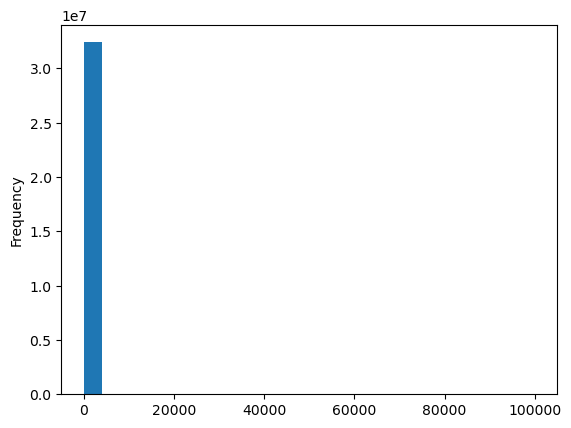

In [10]:
#Creating a histogram of the price distribution with the plot.hist() function off of the new library.
df['prices'].plot.hist(bins = 25)

### #Obviously, something is wrong with the histogram as it should not look like that. The entire point of the bins argument within the plot.hist() function is to assign 25 intervals for the data. However, this chart has created only one bar which tells us that the data is either heavily skewed (which we would have noticed) or there is something wrong/corrupted with the data.

### #To check that, we will plot a scatterplot graph using the 'prices' for both columns in an effort to understand the data better and visually see if there are any obvious outliers.

<Axes: xlabel='prices', ylabel='prices'>

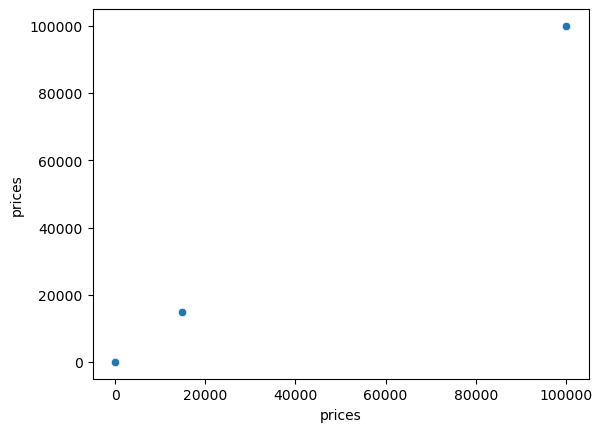

In [12]:
#Creating a scatterplot, now using the sns(seaborn) library that we imported at the beginning of the notebook.
sns.scatterplot(x='prices', y='prices',data=df)

### #Given supermarket values, we assume the regular price range is anywhere between 5 and 20 dollars. Meaning there is something seriously corrupted if we are getting several price points near the 20k and 100k mark. To figure out the issue, we will call a function that will find all rows in which the 'prices' value is over 100 dollars.

In [13]:
df.loc[df['prices']>100]

product_id                      product_name  aisle_id  \
13100147       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100148       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100149       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100150       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100151       21553  Lowfat 2% Milkfat Cottage Cheese       108   
...              ...                               ...       ...   
21786876       33664             2 % Reduced Fat  Milk        84   
21786877       33664             2 % Reduced Fat  Milk        84   
21786878       33664             2 % Reduced Fat  Milk        84   
21786879       33664             2 % Reduced Fat  Milk        84   
21786880       33664             2 % Reduced Fat  Milk        84   

          department_id   prices  order_id  user_id  order_number  \
13100147             16  14900.0    912404       17            12   
13100148             16  14900.0    603376       17            22   
13100149             16  14900.0   3264360      135             2   
13100150             16  14900.0    892534      135             3   
13100151             16  14900.0    229704      342             8   
...                 ...      ...       ...      ...           ...   
21786876             16  99999.0   2249946   204099            29   
21786877             16  99999.0   2363282   204099            31   
21786878             16  99999.0   3181945   204395            13   
21786879             16  99999.0   2486215   205227             7   
21786880             16  99999.0   2232716   205227            10   

          orders_day_of_week  order_hour_of_day  ...  reordered  \
13100147                   2                 14  ...          0   
13100148                   6                 16  ...          1   
13100149                   2                 21  ...          0   
13100150                   0                  8  ...          1   
13100151                   1                 19  ...          0   
...                      ...                ...  ...        ...   
21786876                   0                  8  ...          0   
21786877                   0                  9  ...          1   
21786878                   3                 15  ...          0   
21786879                   3                 20  ...          0   
21786880                   0                 11  ...          1   

               price_segment    busiest_days   busiest_hours max_order  \
13100147  High_range product  Regularly busy     Most orders        40   
13100148  High_range product  Regularly busy  Average_orders        40   
13100149  High_range product  Regularly busy  Average_orders         4   
13100150  High_range product     Busiest day  Average_orders         4   
13100151  High_range product     Busiest day  Average_orders        16   
...                      ...             ...             ...       ...   
21786876  High_range product     Busiest day  Average_orders        39   
21786877  High_range product     Busiest day  Average_orders        39   
21786878  High_range product      Least busy     Most orders        15   
21786879  High_range product      Least busy  Average_orders        12   
21786880  High_range product     Busiest day     Most orders        12   

              loyalty_flag  avg_prod_purchase_price  spender_tier  \
13100147  Regular Customer               108.648299  High Spender   
13100148  Regular Customer               108.648299  High Spender   
13100149      New Customer              1154.792308  High Spender   
13100150      New Customer              1154.792308  High Spender   
13100151  Regular Customer               114.426619  High Spender   
...                    ...                      ...           ...   
21786876  Regular Customer              1106.743956  High Spender   
21786877  Regular Customer              1106.743956  High Spender   
21786878  Regular Customer               451.1535

# #Re-entering data cleaning stage
### #Given that milk and cottage cheese are definitely not in the 15k and 100k price range, we are going to nulliy all 'prices' values in this dataset that are over 100 dollars. By using the following command.

In [15]:
#This function locates and replaces all 'prices' values above $100.
df.loc[df['prices'] >100, 'prices'] = np.nan

In [16]:
#Testing if it worked by calling the max value in the 'prices' column
df['prices'].max()

25.0

### Success!

# #Leaving the data cleaning stage
# #Back to histograms

<Axes: ylabel='Frequency'>

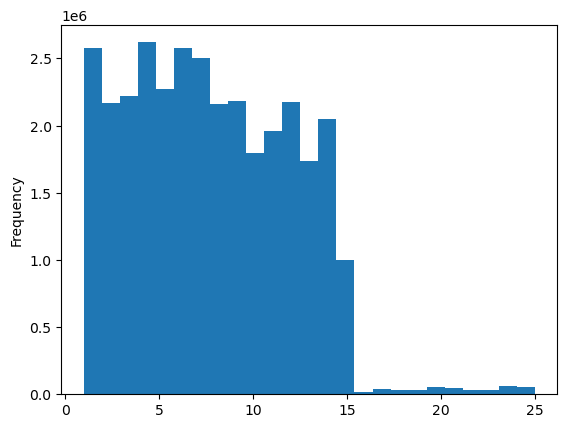

In [17]:
#Now, we will re-try the histogram function and see if works having nullified the outlier values
df['prices'].plot.hist(bins=25)

<Axes: ylabel='Frequency'>

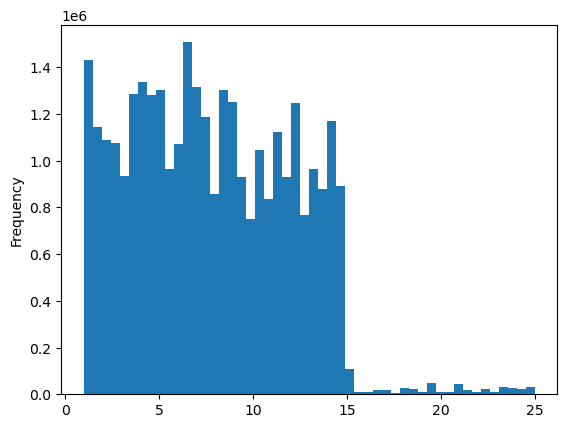

In [18]:
#If we want more detail, we can increase the number of intervals (aka 'bins') to see a higher granularity.
df['prices'].plot.hist(bins=50)

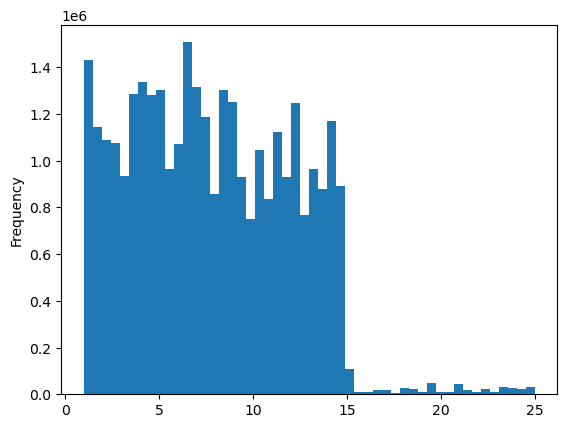

In [21]:
#We will now export the histogram like we did above. First, we create the variable we will use in the export
hist_chart=df['prices'].plot.hist(bins=50)

In [22]:
#Now, we export with the savefig() function
hist_chart.figure.savefig(os.path.join(pathname, '4. Analysis', 'Visualizations', 'hist_chart.png'))

## #Creating a randomized sample of the dataframe for future use

In [23]:
#Using numpy, we create a random but reproducible pattern with the random.seed() function
#Then, you create a new list 'dev' and apply the np.random.rand() func which creates a uniformly distributed 
#randomized values, and each number is assigned a Boolean True or False. This list is the length of the entire df 
#dataframe through the len() function.
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [24]:
#Now, in order to split the dataframe into two samples, we create two variables. big=70%
big=df[dev]

In [26]:
#Now, we create the smaller of the two samples. small=30%
small=df[~dev]

In [28]:
#Testing that they were created correctly
len(df)

32404859

In [29]:
len(big)+len(small)

32404859

In [30]:
#In order to improve memory usage and optimization, we will create a subset which contains the only two columns 
#necessary for this trial.
df2=small[['prices','orders_day_of_week']]

## Now, we will use the sample data to create line charts

/Users/alejandrocisneros/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alejandrocisneros/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


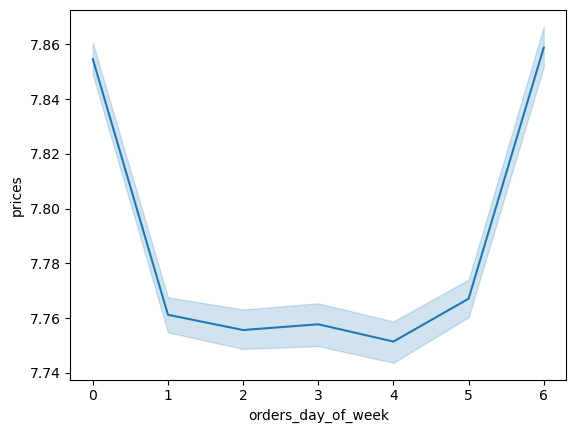

In [32]:
#Now, we can create a line chart that will allow us to see the daily variation in average product purchase price
line_chart=sns.lineplot(data = df2, x='orders_day_of_week', y='prices')